#Import lots of stuff

In [25]:
import pandas as pd
import pylab as pyl
import nltk as nltk
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.tokenize import word_tokenize
import re

#Testing Tokenizer

In [2]:
from nltk.tokenize import word_tokenize
s = '''Good muffins cost $3.88\nin New York.  Please buy me two of them.\n\nThanks.'''
text1 = word_tokenize(s)
# len(text1)
text1

text = word_tokenize("1 I will now stand on the table and sing abiu my love")
nltk.pos_tag(text)

brownText = nltk.Text(word.lower() for word in nltk.corpus.brown.words())
#text.similar('woman')
brownText

<Text: the fulton county grand jury said friday an...>

#Import merged file with annotated tangram names

In [3]:
merged = pd.read_csv('/Users/nickimaslan/Desktop/convention_project/tangrams_replication/ipython_notebooks/merged.csv')
test1 = merged.copy()


#Create Token, word count, Part of Speech columns for nouns, verbs, etc

In [17]:
#enable longer display
pd.set_option('display.height', 500)
pd.set_option('display.max_rows', 500)

#all of the different gameIDs
pd.unique(test1.gameid.ravel())

test2 = test1.copy()
del test2['time']

#create token colum
test2['tokens'] = [[word for word in nltk.word_tokenize(sentence.lower()) if word.isalpha()] for sentence in test2['contents']]
#number of words total

#create part of speech column
test2['pos'] = [nltk.pos_tag(rowTokens) for rowTokens in test2['tokens']]

#create number of words in contents column
test2['numWords'] = [pd.value_counts(words).sum() for words in test2['tokens']]

#remove tangram 0
test2 = test2[test2.tangram != '0']
test2 = test2[test2.tangram != '*']
#only look at tangram C
#test2 = test2[test2.tangram == 'C']


# USE FOR COUNTING words of a given type of speech #

#counts up the numbers associated with each word in a list
def total(l):
    count = 0
    length = len(l)
    for i in range(0,length):
        num = l[i][1]
        count += num
    else: 
        return count
#count up the numbers associated with each word in list of lists (need .values() for dict)
def totalAll(l):
    count = 0
    length = len(l)
    for i in range(0,length):
        num = total(l[i])
        count += num
    else:
        return count
    
#given a tag (like NN) find all the words tagged with that and their frequency
def findtags(tag_prefix, tagged_text):
    cfd = nltk.ConditionalFreqDist((tag, word) for (word, tag) in tagged_text
                                  if tag.startswith(tag_prefix))
    return dict((tag, cfd[tag].most_common(5)) for tag in cfd.conditions())


# TAG PARTS OF SPEECH + COUNT THEM

#show words and number of words that are NN for each row of tags
test2['NN'] = [findtags('NN', text) for text in test2['pos']]

#count number of NN words 
test2['NNnum'] = [totalAll(text.values()) for text in test2['NN']]

#show words and number of words that are VB for each row of tags
test2['VB'] = [findtags('VB', text) for text in test2['pos']]

#count number of VB words 
test2['VBnum'] = [totalAll(text.values()) for text in test2['VB']]

#show words and number of words that are DT for each row of tags
test2['DT'] = [findtags('DT', text) for text in test2['pos']]

#count number of DT words 
test2['DTnum'] = [totalAll(text.values()) for text in test2['DT']]

#show words and number of words that are PRP for each row of tags
test2['PRP'] = [findtags('PRP', text) for text in test2['pos']]

#count number of PRP words 
test2['PRPnum'] = [totalAll(text.values()) for text in test2['PRP']]

#show words and number of words that are IN for each row of tags
test2['IN'] = [findtags('IN', text) for text in test2['pos']]

#count number of IN words 
test2['INnum'] = [totalAll(text.values()) for text in test2['IN']]

#show words and number of words that are TO for each row of tags
test2['TO'] = [findtags('TO', text) for text in test2['pos']]

#count number of TO words 
test2['TOnum'] = [totalAll(text.values()) for text in test2['TO']]

#show words and number of words that are RB for each row of tags
test2['RB'] = [findtags('RB', text) for text in test2['pos']]

#count number of RB words
test2['RBnum'] = [totalAll(text.values()) for text in test2['RB']]


height has been deprecated.



#NN/NumWords over each round for a tangram

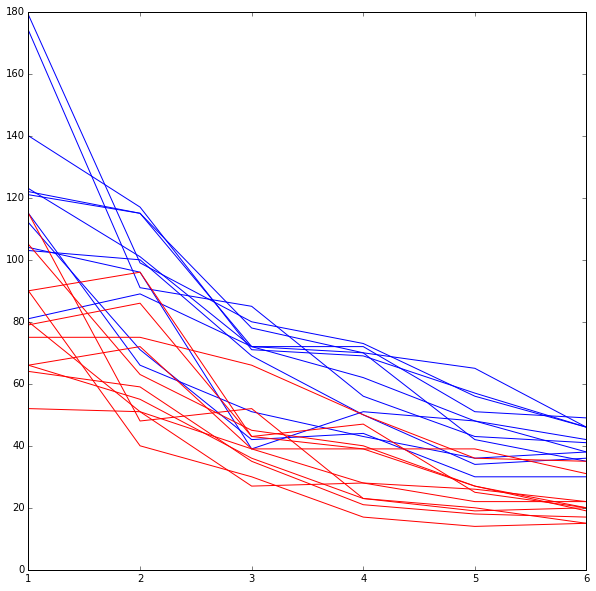

In [29]:
#look at specific tangram if desirable
test3 = test2.copy()
#test3 = test3[test3.tangram == "A"]


#groupby tangram and roundNum
wordNums = test3.groupby(['tangram', 'roundNum']).sum()


#PLOT NN parts of speech

pork_NN_A = wordNums.loc['A': 'A', 'NNnum': 'NNnum']
df_NN_A = pork_NN_A['NNnum'].tolist()

pork_NN_B = wordNums.loc['B': 'B', 'NNnum': 'NNnum']
df_NN_B = pork_NN_B['NNnum'].tolist()

pork_NN_C = wordNums.loc['C': 'C', 'NNnum': 'NNnum']
df_NN_C = pork_NN_C['NNnum'].tolist()

pork_NN_D = wordNums.loc['D': 'D', 'NNnum': 'NNnum']
df_NN_D = pork_NN_D['NNnum'].tolist()

pork_NN_E = wordNums.loc['E': 'E', 'NNnum': 'NNnum']
df_NN_E = pork_NN_E['NNnum'].tolist()

pork_NN_F = wordNums.loc['F': 'F', 'NNnum': 'NNnum']
df_NN_F = pork_NN_F['NNnum'].tolist()

pork_NN_G = wordNums.loc['G': 'G', 'NNnum': 'NNnum']
df_NN_G = pork_NN_G['NNnum'].tolist()

pork_NN_H = wordNums.loc['H': 'H', 'NNnum': 'NNnum']
df_NN_H = pork_NN_H['NNnum'].tolist()

pork_NN_I = wordNums.loc['I': 'I', 'NNnum': 'NNnum']
df_NN_I = pork_NN_I['NNnum'].tolist()

pork_NN_J = wordNums.loc['J': 'J', 'NNnum': 'NNnum']
df_NN_J = pork_NN_J['NNnum'].tolist()

pork_NN_K = wordNums.loc['K': 'K', 'NNnum': 'NNnum']
df_NN_K = pork_NN_K['NNnum'].tolist()

pork_NN_L = wordNums.loc['L': 'L', 'NNnum': 'NNnum']
df_NN_L = pork_NN_L['NNnum'].tolist()

#plotting NN
fig = plt.figure(figsize=(10, 10), dpi=100)
rounds = [1,2,3,4,5,6]
NN_A = df_NN_A
NN_B = df_NN_B
NN_C = df_NN_C
NN_D = df_NN_D
NN_E = df_NN_E
NN_F = df_NN_F
NN_G = df_NN_G
NN_H = df_NN_H
NN_I = df_NN_I
NN_J = df_NN_J
NN_K = df_NN_K
NN_L = df_NN_L

plt.plot(rounds, NN_A, color='blue')
plt.plot(rounds, NN_B, color='blue')
plt.plot(rounds, NN_C, color='blue')
plt.plot(rounds, NN_D, color='blue')
plt.plot(rounds, NN_E, color='blue')
plt.plot(rounds, NN_F, color='blue')
plt.plot(rounds, NN_G, color='blue')
plt.plot(rounds, NN_H, color='blue')
plt.plot(rounds, NN_I, color='blue')
plt.plot(rounds, NN_J, color='blue')
plt.plot(rounds, NN_K, color='blue')


#PLOTTING VB

pork_VB_A = wordNums.loc['A': 'A', 'VBnum': 'VBnum']
df_VB_A = pork_VB_A['VBnum'].tolist()

pork_VB_B = wordNums.loc['B': 'B', 'VBnum': 'VBnum']
df_VB_B = pork_VB_B['VBnum'].tolist()

pork_VB_C = wordNums.loc['C': 'C', 'VBnum': 'VBnum']
df_VB_C = pork_VB_C['VBnum'].tolist()

pork_VB_D = wordNums.loc['D': 'D', 'VBnum': 'VBnum']
df_VB_D = pork_VB_D['VBnum'].tolist()

pork_VB_E = wordNums.loc['E': 'E', 'VBnum': 'VBnum']
df_VB_E = pork_VB_E['VBnum'].tolist()

pork_VB_F = wordNums.loc['F': 'F', 'VBnum': 'VBnum']
df_VB_F = pork_VB_F['VBnum'].tolist()

pork_VB_G = wordNums.loc['G': 'G', 'VBnum': 'VBnum']
df_VB_G = pork_VB_G['VBnum'].tolist()

pork_VB_H = wordNums.loc['H': 'H', 'VBnum': 'VBnum']
df_VB_H = pork_VB_H['VBnum'].tolist()

pork_VB_I = wordNums.loc['I': 'I', 'VBnum': 'VBnum']
df_VB_I = pork_VB_I['VBnum'].tolist()

pork_VB_J = wordNums.loc['J': 'J', 'VBnum': 'VBnum']
df_VB_J = pork_VB_J['VBnum'].tolist()

pork_VB_K = wordNums.loc['K': 'K', 'VBnum': 'VBnum']
df_VB_K = pork_VB_K['VBnum'].tolist()

pork_VB_L = wordNums.loc['L': 'L', 'VBnum': 'VBnum']
df_VB_L = pork_VB_L['VBnum'].tolist()

#plotting
#fig = plt.figure(figsize=(10, 10), dpi=100)
rounds = [1,2,3,4,5,6]
VB_A = df_VB_A
VB_B = df_VB_B
VB_C = df_VB_C
VB_D = df_VB_D
VB_E = df_VB_E
VB_F = df_VB_F
VB_G = df_VB_G
VB_H = df_VB_H
VB_I = df_VB_I
VB_J = df_VB_J
VB_K = df_VB_K
VB_L = df_VB_L

plt.plot(rounds, VB_A, color='red')
plt.plot(rounds, VB_B, color='red')
plt.plot(rounds, VB_C, color='red')
plt.plot(rounds, VB_D, color='red')
plt.plot(rounds, VB_E, color='red')
plt.plot(rounds, VB_F, color='red')
plt.plot(rounds, VB_G, color='red')
plt.plot(rounds, VB_H, color='red')
plt.plot(rounds, VB_I, color='red')
plt.plot(rounds, VB_J, color='red')
plt.plot(rounds, VB_K, color='red')






#plt.plot(rounds, NN_A, color='red')
#plt.plot(rounds, VB_A, color='blue')
#plt.plot(rounds, PRP_A, color='purple')

#figure out how to graph from dataframe or just create dataframes for what you want to graph

#Testing word count function

In [6]:
text = {'NN': [('guy', 1), ('hi', 13)], 'NNS': [('arms', 1)]}
text.values()[1][1][1]
list1 = [('guy', 1), ('hi', 1), ('yoyo', 20)]

#counts up the numbers associated with each word in a list
def total(l):
    count = 0
    length = len(l)
    for i in range(0,length):
        num = l[i][1]
        print num
        count += num
        #print count
    else: 
        return count
#count up the numbers associated with each word in list of lists (need .values() for dict)
def totalAll(l):
    count = 0
    length = len(l)
    for i in range(0,length):
        num = total(l[i])
        count += num
    else:
        return count
    
#totalAll(text.values())

#text.values()[1][1][0]

In [7]:
pd.set_option('display.height', 500)
pd.set_option('display.max_rows', 500)

#given a tag (like NN) find all the words tagged with that and their frequency
def findtags(tag_prefix, tagged_text):
    cfd = nltk.ConditionalFreqDist((tag, word) for (word, tag) in tagged_text
                                  if tag.startswith(tag_prefix))
    return dict((tag, cfd[tag].most_common(5)) for tag in cfd.conditions())

#tokenize contents and look at one tangram at a time and groupby gameid, tangram, roundNum, contents
test1['tokens'] = [[word for word in nltk.word_tokenize(sentence.lower()) if word.isalpha()] for sentence in test1['contents']]
test2 = test1.copy()
del test2['time']

#tag part of speech for each token
test2['pos'] = [nltk.pos_tag(rowTokens) for rowTokens in test2['tokens']]


for g in ['1903-d']:
    for i in ['1', '2', '3', '4', '5', '6']:
        for t in ['A']:
            test2 = test2[(test2.tangram == t) & (test2.gameid == g) & (test2.roundNum == i)]
            #test2.groupby(['gameid', 'tangram', 'roundNum', 'contents']).sum()
            #print(test2)

            #create part of speech column
            test2['pos'] = [nltk.pos_tag(rowTokens) for rowTokens in test2['tokens']]

            tags = test2['pos']
            #turn tags from series into list and flatten
            tags.tolist()
            tagsFlat = [item for sublist in tags for item in sublist]
            #tagsFlat

            #look at frequency of parts of speech 
            tags_fd = nltk.FreqDist(tag for (word, tag) in tagsFlat)
            tags_fd.most_common()

            #locate all words tagged with NN and display their frequency
            tagdictVB = findtags('VB', tagsFlat)
            tagdictNN = findtags('NN', tagsFlat)
            

            #for tag in sorted(tagdict): print(tag, tagdict[tag])
            #print(g, i, t, tagdictVB)
            #print(g, i, t, tagdictNN)
            print(tagsFlat)

    
else:
    print("All done!")


#CC, VB, DT, NN, CD


height has been deprecated.

[('and', 'CC'), ('is', 'VBZ'), ('or', 'CC'), ('a', 'DT'), ('rabbit', 'NN'), ('is', 'VBZ'), ('the', 'DT'), ('one', 'CD'), ('kicking', 'VBG')]
[]
[]
[]
[]
[]
All done!


#Plotting word frequency distribution 

In [10]:
merged = pd.read_csv('/Users/nickimaslan/Desktop/convention_project/tangrams_replication/data/annotated_names/merged.csv')
merged.drop(['gameid','time'], axis=1)
from itertools import chain
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

def tokenize(listOfStrings):
    mergedStr = []
    for wordStr in listOfStrings :   
        potato = nltk.word_tokenize(wordStr)
        mergedStr.append(potato)
    flat = [item for sublist in mergedStr for item in sublist]
    return flat
#     return list(chain.from_iterable(mergedStr))

def tangram(merged, tangram, roundNum ):   ##select tangram and round you want to look at
    merged.drop(['gameid','time'], axis=1)
    tanMerged = merged[merged['tangram'] == tangram]
    tanRound = tanMerged[tanMerged['roundNum'] == roundNum]
    return tanRound

def tokTan(dataframe):       ##will tokenize the contents grouped by roundNum
    wordsCountedC1 = dataframe.groupby(['roundNum'])['contents'].aggregate(tokenize)
    return wordsCountedC1

def cleanup(listofStrings):  ##only will do one list at a time
    listofStrings = [w for w in listofStrings if w not in stopwords]
    listofStrings = [w for w in listofStrings if w.isalpha()]
    listofStrings = [w for w in listofStrings if len(w) > 2]
    listofStrings = [w.lower() for w in listofStrings if w.isalpha()] 
    listofStrings = [w for w in listofStrings if w not in ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', 'the', 'like', 'either' 'ready', 'yeah' 'really,' 'ok', 'looks', 'okay', 'one', 'got', 'go']]
    return listofStrings

##example with tangram C on round1
tangramCr1 = tangram(merged, 'C', '1')
tokCr1 = tokTan(tangramCr1)
cleanCr1 = cleanup(tokCr1[0])
cleanCr1

##plot the frequency distribution

wordsCounted = merged.groupby(['roundNum'])['contents'].aggregate(tokenize)    #list of words in each round
cleaned1 = cleanup(wordsCounted[0])  # cleaned up list of words in round1
cleaned2 = cleanup(wordsCounted[1])
cleaned3 = cleanup(wordsCounted[2])
cleaned4 = cleanup(wordsCounted[3])
cleaned5 = cleanup(wordsCounted[4])
cleaned6 = cleanup(wordsCounted[5])

c = 0
while c < 6:
    cleanWords = cleanup(wordsCounted[c])
    c = c + 1

#cleanWords
#cleaned2

#wordsCounted
#fdist1 = nltk.FreqDist(cleaned)
#fdist1.plot(30, cumulative=False)





#  Tangram C vs G graph

[18.0, 12.0, 5.0, 6.0, 4.0, 4.0]
[31.0, 13.0, 16.0, 7.0, 5.0, 5.0]
[18.0, 12.0, 5.0, 6.0, 4.0, 4.0]
[31.0, 13.0, 16.0, 7.0, 5.0, 5.0]


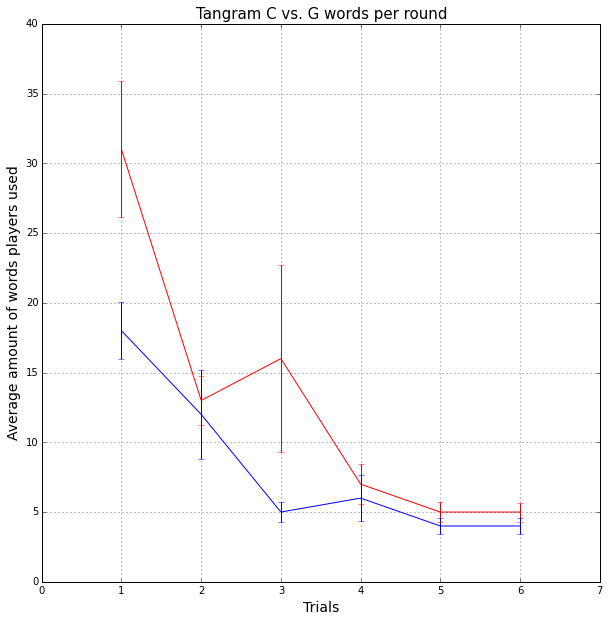

In [5]:
merged = pd.read_csv('/Users/nickimaslan/Desktop/convention_project/tangrams_replication/data/annotated_names/merged.csv')
from itertools import chain
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

def countWords(listOfStrings):
    wordCount = 0
    for wordStr in listOfStrings :   
        potato = nltk.word_tokenize(wordStr) # tokenize it (returns a list of words)
        cleanPotato = cleanup(potato)
        length = len(potato)   # get length of token list
        wordCount = wordCount + length # add that number to wordCount
    return wordCount

def cleanup(aStr) :
    listofStrings = [w for w in aStr if w not in stopwords]
    listofStrings = [w for w in listofStrings if w.isalpha()]
    listofStrings = [w for w in listofStrings if len(w) > 2]
    listofStrings = [w.lower() for w in listofStrings if w.isalpha()] 
    listofStrings = [w for w in listofStrings if w not in ['like', 'either' 'ready', 'yeah' 'really,' 'ok', 'looks', 'okay', 'one', 'got', 'go']]
    return listofStrings

tanC = merged[merged['tangram'] == 'C']
tanG = merged[merged['tangram'] == 'G']

def getMean(dataframe):
    meanList = []
    for roundNumber in [1,2,3,4,5,6] :
        mergeByRound = dataframe[dataframe['roundNum'] == '%d' %roundNumber]
        wordsCounted = mergeByRound.groupby(['roundNum'])['contents'].aggregate(countWords)
        wordsPerRound = wordsCounted.apply(lambda x: x/(24))
        wordMean = wordsPerRound.mean()
        meanList.append(wordMean)
    return meanList

print(getMean(tanC))
print(getMean(tanG))
# print(tanC)
# print(tanG)



def getStDev(dataframe):
    stdList = []
    for roundNumber in [1,2,3,4,5,6] :
        mergeByRound = dataframe[dataframe['roundNum'] == '%d' %roundNumber]
        wordsCounted = mergeByRound.groupby(['roundNum','gameid'])['contents'].aggregate(countWords)
        wordsPerRound = wordsCounted.apply(lambda x: x/(1))
        std = wordsPerRound.std()
        stdList.append(std)
    return stdList



##df for tangram C
tanC = merged[merged['tangram'] == 'C']
wordsCountedC = tanC.groupby(['roundNum','gameid'])['contents'].aggregate(countWords)
meanC = getMean(tanC)
stErrorC = getStDev(tanC)/np.sqrt(24)
print(meanC)

%matplotlib inline


# ##df for tangram G
tanG = merged[merged['tangram'] == 'G']
wordsCountedG = tanG.groupby(['roundNum', 'gameid'])['contents'].aggregate(countWords)
meanG = getMean(tanG)
stErrorG = getStDev(tanG)/np.sqrt(24)
stErrorG
print(meanG)

##plot it
##data to be plotted
# wordsPerRound = wordsCounted.apply(lambda x: x/(12*24))
rounds = [1,2,3,4,5,6]

##error data

fig = plt.figure(figsize=(10, 10), dpi=100)

##plotting
# fig = plt.figure(figsize=(6, 6))
# axes = fig.add_subplot(111)
plt.plot(rounds, meanG, color='red')
plt.plot(rounds, meanC, color='blue')
# 
##plot error bars
plt.errorbar(rounds,meanG,yerr=stErrorG, linestyle="None", color="red")
plt.errorbar(rounds,meanC,yerr=stErrorC, linestyle="None", color="blue")




#configure x and y axes
plt.ylim([0,40])
plt.xlim([0,7])
plt.title('Tangram C vs. G words per round', size=15)
plt.grid(True)
plt.xlabel('Trials', size=14)
plt.ylabel('Average amount of words players used', size=14)

##save plot
plt.savefig("/Users/nickimaslan/Desktop/GvsCTangrams.png", bbox_inches='tight')

##show plot
plt.show()


# Avg Director word count for each tangram


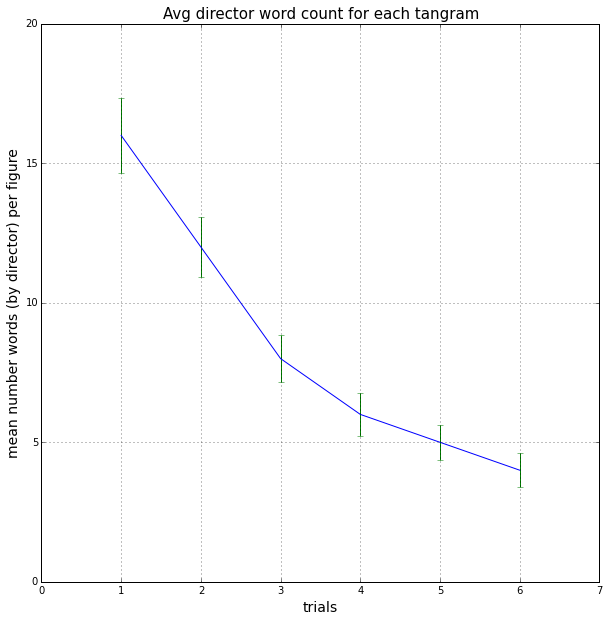

In [564]:
merged = pd.read_csv('/Users/nickimaslan/Desktop/convention_project/tangrams_replication/data/annotated_names/merged.csv')
from itertools import chain
def countWords(listOfStrings):
    wordCount = 0
    for wordStr in listOfStrings :   
        potato = nltk.word_tokenize(wordStr) # tokenize it (returns a list of words)
        length = len(potato)   # get length of token list
        wordCount = wordCount + length # add that number to wordCount
    return wordCount
        
# merged.groupby(['tangram'])['roundNum'].apply(plus1)
merged = merged[merged['sender'] == 'director']
merged = merged[merged['tangram'] != '0']
merged = merged[merged['tangram'] != '10']
merged = merged[merged['tangram'] != ':']

def getStDev(dataframe):
    stdList = []
    for roundNumber in [1,2,3,4,5,6] :
        mergeByRound = merged[merged['roundNum'] == '%d' %roundNumber]
        wordsCounted = mergeByRound.groupby(['roundNum','gameid'])['contents'].aggregate(countWords)
        wordsPerRound = wordsCounted.apply(lambda x: x/(12))
        std = wordsPerRound.std()
        stdList.append(std)
    return stdList

error = np.sqrt(24)

%matplotlib inline

wordsCounted = merged.groupby(['roundNum'])['contents'].aggregate(countWords)

##data to be plotted
wordsPerRound = wordsCounted.apply(lambda x: x/(12*24))
rounds = [1,2,3,4,5,6]

##error data
stdErrorList = getStDev(merged)/error

fig = plt.figure(figsize=(10, 10), dpi=100)

##plotting
# fig = plt.figure(figsize=(6, 6))
# axes = fig.add_subplot(111)
plt.plot(rounds, wordsPerRound)

##plot error bars
plt.errorbar(rounds,wordsPerRound,yerr=stdList, linestyle="None", color="green")

#configure x and y axes
plt.ylim([0,20])
plt.xlim([0,7])
plt.title('Avg director word count for each tangram', size=15)
plt.grid(True)
plt.xlabel('trials', size=14)
plt.ylabel('mean number words (by director) per figure', size=14)

##save plot
plt.savefig("/Users/nickimaslan/Desktop/avgWordsTallFont.png", bbox_inches='tight')

##show plot
plt.show()


In [4]:
merged = pd.read_csv('/Users/nickimaslan/Desktop/convention_project/tangrams_replication/data/annotated_names/merged.csv')
# merged.ix[0:, ['contents', 'tangram']]
tangramMerge = merged[merged['tangram'] != '0']
tangram = merged[merged['tangram'] == 'G']
tangramRound = tangram[tangram['roundNum'] == '6']
contents = tangramRound.ix[0:, ['contents']]
contents



,contents
135,1: the yoga dude
391,7 hippo
392,k
567,10 lounging rabbit
676,10 dancing women
836,triangle man
981,mostly rectangle on left and 2 triangle edges ...
982,4
1212,slide-n-slide
1428,6 has large L on the bottom


#Score Test

In [44]:
score_test = pd.read_csv('/Users/nickimaslan/Desktop/convention_project/tangrams_replication/data/good_dropObj/0215-4.csv')
score1 = score_test[[' roundNum', ' score']]
#score_group = score1.groupby('roundNum')
score1

,roundNum,score
0,1,0
1,1,0
2,1,1
3,1,2
4,1,1
5,1,2
6,1,3
7,1,3
8,1,3
9,1,3
